In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('regression_data.csv', header=None)
print(data.shape)
# Rename columns A, B, C as X1, X2 and Y, respectively 
data.columns = ['X1', 'X2', 'Y']
data.head()

(300, 3)


,X1,X2,Y
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [3]:
X1 = data['X1'].values
X2 = data['X2'].values
Y = data['Y'].values

The equation for linear regression with two predictor variables is:
$$ y = b_0 + b_1x_1 + b_2x_2 $$

Use the following formula to calculate the regression coefficients of the multiple regression line

$$ b_0 = \bar{y} - b_1\bar{x_1} + b_2\bar{x_2} $$

$$ b_1 = \frac{(\sum_{}^{}x_2^2)(\sum_{}^{}x_1y) - (\sum_{}^{}x_1x_2)(\sum_{}^{}x_2y)}{(\sum_{}^{}x_1^2)(\sum_{}^{}x_2^2) - (\sum_{}^{}x_1x_2)^2} $$

$$ b_2 = \frac{(\sum_{}^{}x_1^2)(\sum_{}^{}x_2y) - (\sum_{}^{}x_1x_2)(\sum_{}^{}x_1y)}{(\sum_{}^{}x_1^2)(\sum_{}^{}x_2^2) - (\sum_{}^{}x_1x_2)^2} $$

where

$$ \sum_{}^{}x_i^2 = \sum_{}^{}X_i^2 - \frac{(\sum_{}^{}X_i)^2}{N} $$ 
$$ \sum_{}^{}x_iy = \sum_{}^{}X_iY - \frac{(\sum_{}^{}X_i)(\sum_{}^{}Y)}{N} $$
$$ \sum_{}^{}x_1x_2 = \sum_{}^{}X_1X_2 - \frac{(\sum_{}^{}X_1)(\sum_{}^{}X_2)}{N} $$

In [4]:
## Calculate the regression coefficients
mean_x1 = np.mean(X1)
mean_x2 = np.mean(X2)
mean_y = np.mean(Y)

n = len(X1)

sum_x1_sq = sum(X1**2) - (sum(X1)**2/n)
sum_x2_sq = sum(X2**2) - (sum(X2)**2/n)
sum_x1y = sum(X1*Y) - (sum(X1)*sum(Y))/n
sum_x2y = sum(X2*Y) - (sum(X2)*sum(Y))/n
sum_x1x2 = sum(X1*X2) - (sum(X1)*sum(X2))/n

# print(sum_x1_sq)
# print(sum_x2_sq)
# print(sum_x1y)
# print(sum_x2y)
# print(sum_x1x2)

b1 = (sum_x2_sq*sum_x1y - sum_x1x2*sum_x2y)/(sum_x1_sq*sum_x2_sq - sum_x1x2**2)
b2 = (sum_x1_sq*sum_x2y - sum_x1x2*sum_x1y)/(sum_x1_sq*sum_x2_sq - sum_x1x2**2)
b0 = np.mean(Y) - b1*np.mean(X1) - b2*np.mean(X2)

print("The regression coefficients are b0: {}, b1: {}, and b2: {}".format(b0, b1, b2))

The regression coefficients are b0: -19.293752803467314, b1: -8.067220401353902, and b2: -1.7780115695244172


<IPython.core.display.Javascript object>


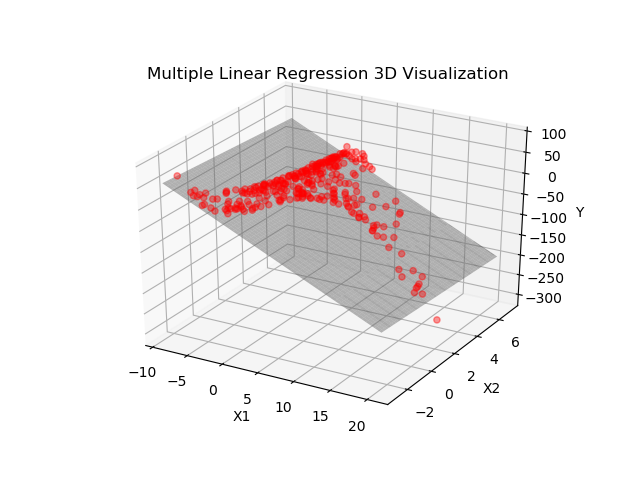

In [5]:
## Graph the data
from mpl_toolkits.mplot3d import Axes3D

x1_surf, x2_surf = np.meshgrid(np.linspace(data.X1.min(), data.X1.max(),100), np.linspace(data.X2.min(), data.X2.max(), 100))
onlyX = pd.DataFrame({'X1': x1_surf.ravel(), 'X2': x2_surf.ravel()})
fitY = b0 + b1*onlyX['X1'].values + b2*onlyX['X2'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='red', alpha=0.4)
ax.plot_surface(x1_surf, x2_surf, fitY.reshape(x1_surf.shape), color='gray', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_zlim(-320,100)
ax.set_title('Multiple Linear Regression 3D Visualization')
plt.show()